#### Using Tensorboard

In [8]:
# Import standard libraries that you may use most times
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------------------
# 1. Some book keeping    
print("TensorFlow version:", tf.__version__)


# 2. Load the data set
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to 0 through 1
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Shape of the data", x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# -------------------------------------------------------------------------
def plot( x=x_train, y= y_train, image_index=888, yh=""):
    plt.imshow(x[image_index], cmap='Greys');
    plt.title (f"{y[image_index]}: ^{yh}" );
    plt.tick_params(left= False, labelleft = False , labelbottom = False, bottom = False)

# 3. Create a model

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', name="layer_1"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax", name="layer_n")
])

TensorFlow version: 2.11.0
Shape of the data (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
## You may overide these callbacks and do processing.
## This includes ending training, saving models etc.

#def on_train_begin(self, logs=None)
#def on_train_end(self, logs=None):
#def on_test_begin(self, logs=None):
#def on_test_end(self, logs=None):
#def on_predict_begin(self, logs=None):
#def on_predict_end(self, logs=None):
#def on_train_batch_begin(self, batch, logs=None):
#def on_train_batch_end(self, batch, logs=None):
#def on_test_batch_begin(self, batch, logs=None):
#def on_test_batch_end(self, batch, logs=None):
#def on_predict_batch_begin(self, batch, logs=None):
#def on_predict_batch_end(self, batch, logs=None):

In [3]:
# You can also use pre built callbacks
# See refrence: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
'''
class ModelCheckpoint:      Callback to save the Keras model or model weights at some frequency.
class ProgbarLogger:        Callback that prints metrics to stdout.
class ReduceLROnPlateau:    Reduce learning rate when a metric has stopped improving.
class RemoteMonitor:        Callback used to stream events to a server.
class TensorBoard:          Enable visualizations for TensorBoard.
''';

In [9]:
tbcb   = tf.keras.callbacks.TensorBoard(log_dir="logs/sgd", histogram_freq=1)
# 4 Compile the model
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, verbose= False, callbacks=[tbcb])

In [ ]:
tbcb   = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq=1)
# 4 Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, verbose= False, callbacks=[tbcb])

In [5]:
#model.weights

### Tensorboard

In [6]:
%load_ext tensorboard

%tensorboard --logdir logs/

### Test the model

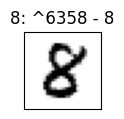

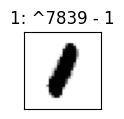

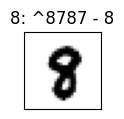

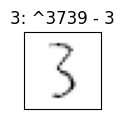

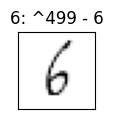

In [7]:
import random

for j in range(5):
    i=random.randint(0,len(x_test))
    plt.figure(figsize=(1,1))
    p = model(x_test[i, np.newaxis])
    plot(x_test, y_test, i, f'{i} - {np.argmax(p)}')
    plt.show()